<a href="https://colab.research.google.com/github/Abyukth-DA-code/SCT_ML_4/blob/main/SCT_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gesture_dataset 0
gesture_dataset/Peace 20
gesture_dataset/ThumbsUp 20
gesture_dataset/Stop 20
Found 48 images belonging to 3 classes.
Found 12 images belonging to 3 classes.
Classes: {0: 'Peace', 1: 'Stop', 2: 'ThumbsUp'}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.2986 - loss: 1.6492
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to hand_gesture_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2917 - loss: 1.6057 - val_accuracy: 0.6667 - val_loss: 0.9485
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5729 - loss: 0.9713
Epoch 2: val_accuracy improved from 0.66667 to 1.00000, saving model to hand_gesture_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - accuracy: 0.5703 - loss: 0.9677 - val_accuracy: 1.0000 - val_loss: 0.6634
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.8056 - loss: 0.6241
Epoch 3: val_accuracy did not improve from 1.00000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.7865 - loss: 0.6441 - val_accuracy: 1.0000 - val_loss: 0.5086
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8229 - loss: 0.5604
Epoch 4: val_accuracy did not improve from 1.00000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.8359 - loss: 0.5571 - val_accuracy: 1.0000 - val_loss: 0.3470
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9653 - loss: 0.3525
Epoch 5: val_accuracy did not improve from 1.00000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.9635 - loss: 0.3525 - val_accuracy: 1.0000 - val_loss: 0.2236
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9201 - loss: 0.3218
Epoch 6: val_accuracy did not improve from 1.00000


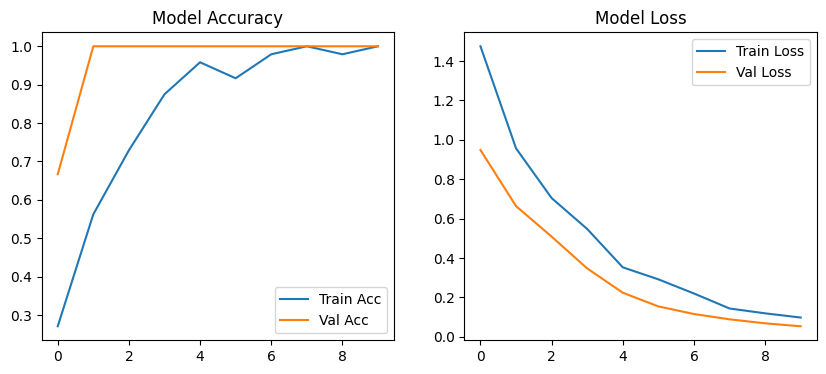

Testing on: gesture_dataset/ThumbsUp/img_9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Gesture: ThumbsUp | Confidence: 0.96489924


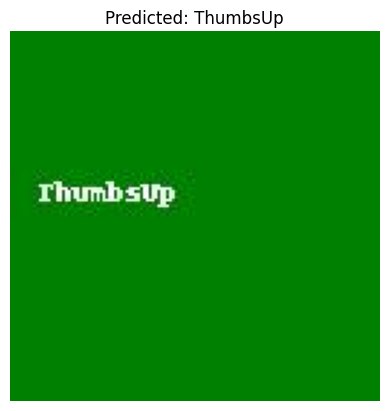

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


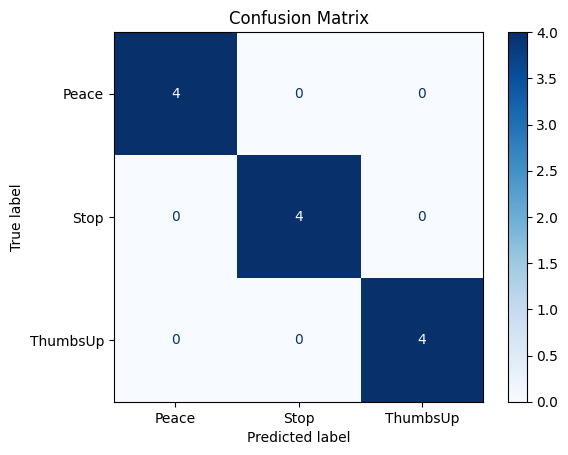

In [1]:
# =========================================================
# Hand Gesture Recognition - Task 04
# =========================================================

import zipfile, os, random, glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# ------------------------------
# 1. Unzip dataset
# ------------------------------
dataset_zip = "gesture_dataset.zip"  # Upload this file to Colab first
with zipfile.ZipFile(dataset_zip, "r") as zip_ref:
    zip_ref.extractall("gesture_dataset")

# Verify structure
for root, dirs, files in os.walk("gesture_dataset"):
    print(root, len(files))

# ------------------------------
# 2. Data Generators
# ------------------------------
IMG_SIZE = 128
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    "gesture_dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    "gesture_dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset="validation"
)

num_classes = len(train_gen.class_indices)
class_map = {v: k for k, v in train_gen.class_indices.items()}
print("Classes:", class_map)

# ------------------------------
# 3. Build Model (MobileNetV2)
# ------------------------------
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
preds = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=preds)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(1e-3), loss="categorical_crossentropy", metrics=["accuracy"])

# ------------------------------
# 4. Train Model
# ------------------------------
checkpoint = ModelCheckpoint("hand_gesture_model.h5", monitor="val_accuracy", save_best_only=True, verbose=1)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[checkpoint]
)

# ------------------------------
# 5. Plot Accuracy & Loss
# ------------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.legend()
plt.show()


sample_img = random.choice(glob.glob("gesture_dataset/*/*.jpg"))
print("Testing on:", sample_img)

img = load_img(sample_img, target_size=(IMG_SIZE, IMG_SIZE))
arr = img_to_array(img)/255.0
arr = np.expand_dims(arr, axis=0)

pred = model.predict(arr)
pred_class = np.argmax(pred, axis=1)[0]
print("Predicted Gesture:", class_map[pred_class], "| Confidence:", np.max(pred))

plt.imshow(load_img(sample_img))
plt.title(f"Predicted: {class_map[pred_class]}")
plt.axis("off")
plt.show()

# ------------------------------
# 7. Confusion Matrix
# ------------------------------
y_true = []
y_pred = []

val_gen.reset()
for i in range(len(val_gen)):
    X, y = val_gen[i]
    preds = model.predict(X)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_map.values()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
